In [9]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.18.0
GPU available: []


In [10]:
import torch

print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)
print("GPU count:", torch.cuda.device_count())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

CUDA available: False
CUDA version: 12.4
GPU count: 0
GPU name: No GPU


In [1]:
# Step 1: Import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load and prepare data
# We'll use the Iris dataset but make it binary by using only two classes
iris = load_iris()
X = iris.data[:100, :2]  # Take only first two features for simplicity and visualization
y = iris.target[:100]    # Take only first two classes (0 and 1)

print("Data shape:", X.shape)
print("Target distribution:", np.bincount(y))

Data shape: (100, 2)
Target distribution: [50 50]


In [3]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 75
Testing set size: 25


In [4]:
# Step 4: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Step 5: Create and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
print("Model training complete!")

Model training complete!


In [6]:
# Step 6: Make predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

In [7]:
# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0000

Confusion Matrix:
[[14  0]
 [ 0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        11

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

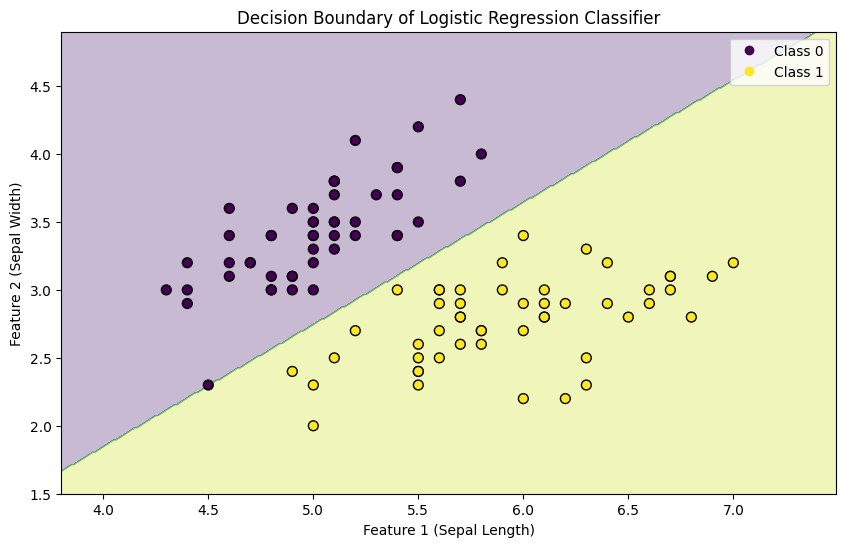

In [8]:
# Step 8: Visualize the decision boundary
def plot_decision_boundary(X, y, model, scaler):
    # Set min and max values with some margin
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Create a mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Scale the mesh grid
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    mesh_points_scaled = scaler.transform(mesh_points)

    # Predict using the model
    Z = model.predict(mesh_points_scaled)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)

    # Plot the training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=50)

    plt.xlabel('Feature 1 (Sepal Length)')
    plt.ylabel('Feature 2 (Sepal Width)')
    plt.title('Decision Boundary of Logistic Regression Classifier')
    plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1'])
    plt.colorbar(plt.cm.ScalarMappable(), label='Predicted Class')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# Visualize decision boundary
plot_decision_boundary(X, y, model, scaler)

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, model, scaler=None):
    # Create a mesh grid based on the input data range
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Prepare grid points for prediction
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    if scaler:
        grid_points = scaler.transform(grid_points)

    # Predict on grid points to create decision boundary
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and scatter plot of data points
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.colorbar(contour)  # Correctly attach colorbar to contour plot

    # Scatter plot for actual data points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='coolwarm', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

# Example usage
# plot_decision_boundary(X, y, model, scaler)  # Uncomment and run with actual data and model

In [15]:
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, model, scaler):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Make predictions
    Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    fig, ax = plt.subplots()
    contour = ax.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    fig.colorbar(contour, ax=ax)  # <-- Pass the ax argument here

    ax.set_title("Decision Boundary")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    plt.show()


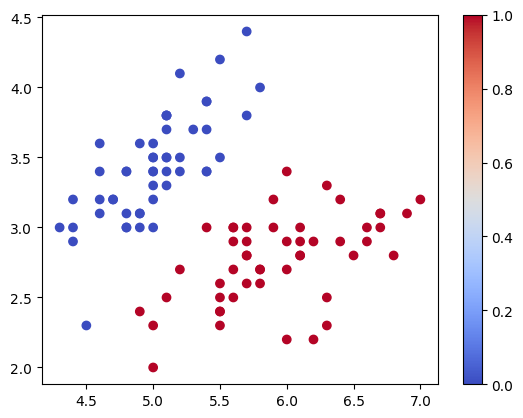

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.colorbar()  # Ensure this line comes right after plt.scatter()
plt.show()

In [9]:
# Step 9: Function to predict new samples
def predict_new_sample(sample, model, scaler):
    # Scale the sample
    sample_scaled = scaler.transform([sample])

    # Make prediction
    prediction = model.predict(sample_scaled)[0]
    probability = model.predict_proba(sample_scaled)[0][1]

    return prediction, probability

# Example usage
new_sample = [5.1, 3.5]  # Example: [sepal length, sepal width]
prediction, probability = predict_new_sample(new_sample, model, scaler)
print(f"\nPrediction for {new_sample}: Class {prediction}")
print(f"Probability of being Class 1: {probability:.4f}")


Prediction for [5.1, 3.5]: Class 0
Probability of being Class 1: 0.0555


In [10]:
# Calculate accuracy manually
manual_accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Manually calculated accuracy: {manual_accuracy:.4f}")

# For ROC curve and AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f"Area Under ROC Curve (AUC): {roc_auc:.4f}")

Manually calculated accuracy: 1.0000
Area Under ROC Curve (AUC): 1.0000
